In [9]:
#creating a dataset
#INPUT
A=['DEAD','LIFE','REINCARNATION']
B=['POSSIBLE','IMPOSSIBLE','IMPOSSIBLE']
#OUTPUT
C=['YES','YES','NO']

#ENCODE
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
A_ENCODE=le.fit_transform(A)
B_ENCODE=le.fit_transform(B)
C_ENCODE=le.fit_transform(C)

#COALATING THE INPUTS
features=list(zip(A_ENCODE, B_ENCODE))

#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
my_model=KNeighborsClassifier(n_neighbors=1)

#TRAINING
my_model.fit(features,C)

#PREDICTION
prediction=my_model.predict([[1, 0]])
print(A_ENCODE)
print(B_ENCODE)
print(C_ENCODE)

prediction

[0 1 2]
[1 0 0]
[1 1 0]


array(['YES'], dtype='<U3')

(237, 4)
0.26342933948939945 325.57342104944223


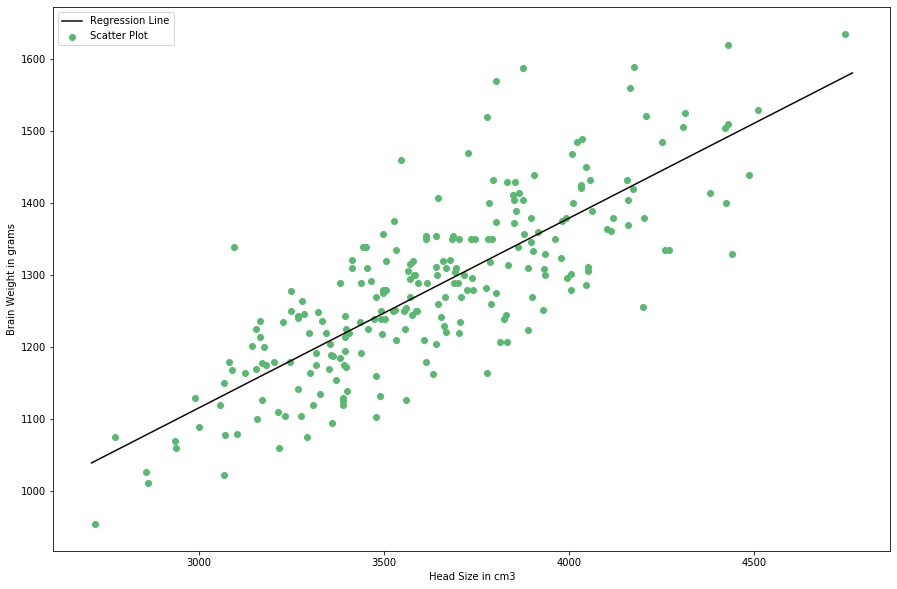

rmse = 72.1206213783709
0.6393117199570003


In [10]:
############LINEAR REGRESSION,LEASTSQUARE AND R-2

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15.0, 10.0)

dataset=pd.read_csv('headbrain.csv')
print(dataset.shape)
dataset.head()

X=dataset['Head Size(cm^3)'].values
Y=dataset['Brain Weight(grams)'].values

X_mean=np.mean(X)
Y_mean=np.mean(Y)

m=len(X)
numerator=0
denominator=0

for i in range(m):
    numerator += (X[i]-X_mean)*(Y[i]-Y_mean)
    denominator += (X[i]-X_mean)**2
slope=numerator/denominator
intercept=Y_mean-(slope*X_mean)

print(slope, intercept)

 #y=0.263x+325
    
# Plotting Values and Regression Line
max_x = np.max(X) + 20
min_x = np.min(X) - 10

x = np.linspace(min_x, max_x, 100)
y = (slope*x)+intercept

# Ploting Line, the predicted
plt.plot(x, y, color='#120501', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, color='#58b970', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = intercept + slope * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print('rmse =', rmse)


# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(m):
    y_pred = intercept + slope * X[i]
    ss_tot += (Y[i] - Y_mean) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)